# Econometrics Analysis

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
t24 = {"X": np.arange(80, 260+20, 20),
       "Y": [70, 65, 90, 95, 110, 115, 120, 140, 155, 150]} 

t25 = {"X": np.arange(80, 260+20, 20),
       "Y": [55, 88, 90, 80, 118, 120, 145, 135, 145, 175]}

t24 = pd.DataFrame(t24)
t25 = pd.DataFrame(t25)

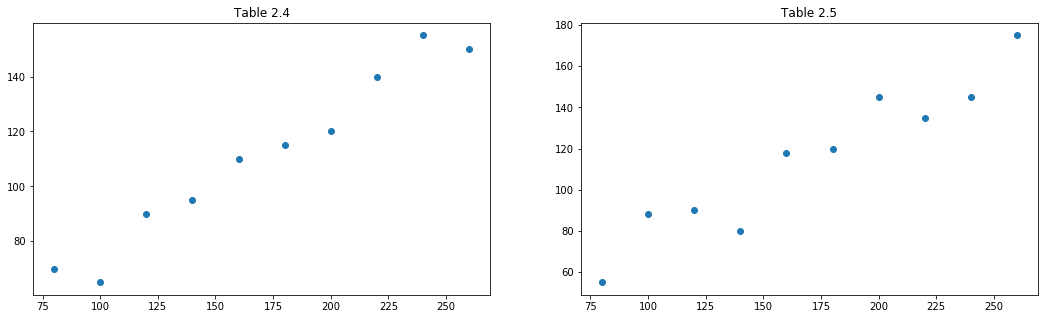

In [19]:
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(121)
plt.scatter(t24.X, t24.Y)
plt.title("Table 2.4")

ax2 = fig.add_subplot(122)
plt.scatter(t25.X, t25.Y)
plt.title("Table 2.5")
plt.show()

# Regressing Tables

Given $X, Y \in \mathbb{R}^n $ , we regress $X$ on $Y$ using the formula
$$
    \beta_1 = \bar Y - \hat\beta_2 \bar X\\
    \beta_2 = \frac{\sum_i x_i y_i}{\sum_i x_i^2}
$$

where
- $x_i := X_i - \bar X$
- $y_i := Y_i - \bar Y$

In [21]:
beta2 = lambda X, Y: np.sum((X - np.mean(X)) * (Y - np.mean(Y))) \
                     / np.sum((X - np.mean(X))**2)
beta1 = lambda X, Y: np.mean(Y) - beta2(X, Y) * np.mean(X)

In [22]:
t24["fit"] = beta1(**t24) + beta2(**t24) * t24.X
t25["fit"] = beta1(**t25) + beta2(**t25) * t25.X

In [23]:
t24

,X,Y,fit
0,80,70,65.181818
1,100,65,75.363636
2,120,90,85.545455
3,140,95,95.727273
4,160,110,105.909091
5,180,115,116.090909
6,200,120,126.272727
7,220,140,136.454545
8,240,155,146.636364
9,260,150,156.818182


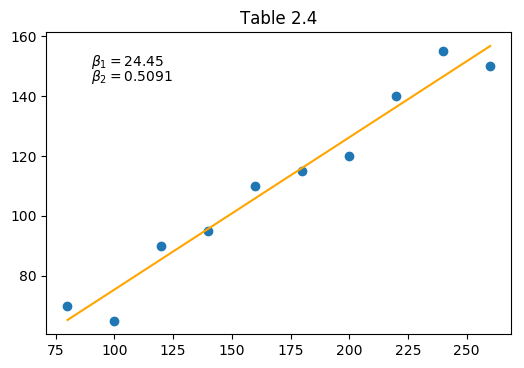

In [34]:
plt.figure(dpi=100)
plt.scatter(t24.X, t24.Y)
plt.title("Table 2.4")
beta1_24 = beta1(t24.X, t24.Y)
beta2_24 = beta2(t24.X, t24.Y)
plt.plot(t24.X, t24.fit, color="orange")
plt.text(90, 150, r"$\beta_1 = {}$".format(round(beta1_24, 2)))
plt.text(90, 145, r"$\beta_2 = {}$".format(round(beta2_24, 4)))
plt.show()

# Errors

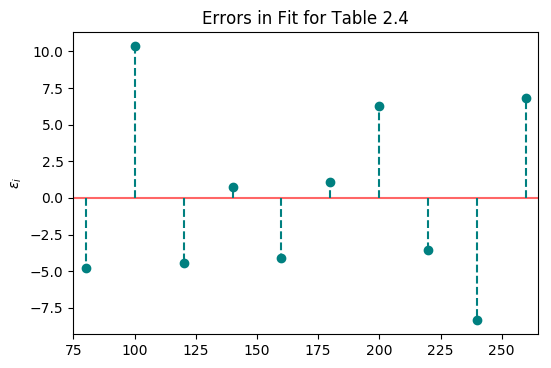

In [69]:
plt.figure(dpi=100)
t24["err"] = t24.fit - t24.Y
plt.scatter(t24.X, t24.err, color="teal")
plt.hlines(0, min(t24.X)-5, max(t24.X)+5, alpha=0.6, color="red")
for e,x in zip(t24.err, t24.X):
    plt.plot((x, x), (0, e), color="teal", linestyle="dashed")
plt.xlim(min(t24.X)-5, max(t24.X)+5)
plt.title("Errors in Fit for Table 2.4")
plt.ylabel(r"$\epsilon_i$")
plt.show()

In [71]:
np.mean(t24.err)

1.4210854715202005e-15